/Users/erenozbek/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Accuracy Score: 
      0.8261742272179847
 Logistic Regression Best Parameter: 
    {'C': 1e-05}
Classification Report:
    
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       433
         1.0       0.83      1.00      0.90      2058

    accuracy                           0.83      2491
   macro avg       0.41      0.50      0.45      2491
weighted avg       0.68      0.83      0.75      2491

Zero-One-Loss for Logistic Regression is:
    0.17382577278201528


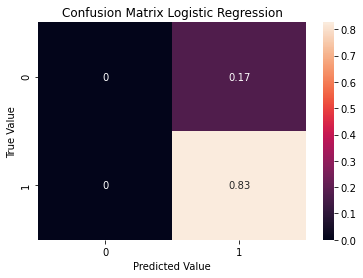

Gaussian NB Accuracy score:
      
      0.8261742272179847
      
    Cross Validation:
        
      [0.82028112 0.82028112 0.82028112 0.82028112 0.82028112 0.82028112
 0.82028112 0.82028112 0.81927711 0.81927711]


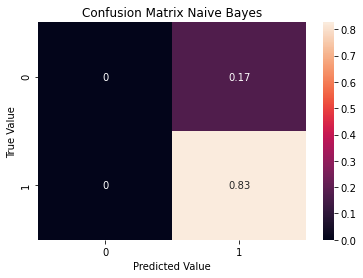

GMM Accuracy Score:
      0.7635487755921316


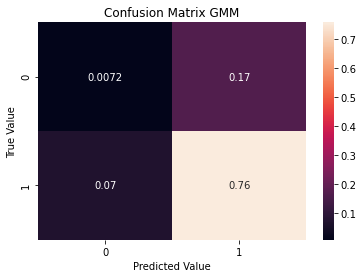

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = pd.read_csv('/Users/erenozbek/Desktop/KocPython2021/HW3/cses4_cut.csv')

#target variable
y = file['voted'].to_numpy()
y = y.astype(float)

#explanotary variables as educational level and househlod income, eliminating the uncertain answers

X1 = file[['D2003']].to_numpy()
X1.reshape(1, 12451)
X1 = X1.astype(float)
for i in range(97,100):
    X1[X1==i] = np.nan
X2 = file[['D2012']].to_numpy()
X2 = X2.astype(float)
for i in range(6,10):
	X2[X2==i] = np.nan
X3 = file[['D2013']].to_numpy()
X3 = X3.astype(float)
for i in range(6,10):
	X3[X3==i] = np.nan

    
#Imputation, changing the data nan with mean value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X1 = imp.fit_transform(X1)
X2 = imp.fit_transform(X2)
X3 = imp.fit_transform(X3)
X = np.concatenate((X1, X2,X3), axis=1)


#Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, zero_one_loss
X_true, X_test, y_true, y_test = train_test_split(X, y, train_size=0.8, random_state=13)

lgr = LogisticRegression()
grid_lgr = GridSearchCV(lgr, {'C':[0.00001, 0.0001 ,0.001, 0.01, 0.1, 1, 10]}, cv=20)
y_pred = grid_lgr.fit(X_true, y_true).predict(X_test)
print(f"""Logistic Regression Accuracy Score: 
      {accuracy_score(y_test, y_pred)}
 Logistic Regression Best Parameter: 
    {grid_lgr.best_params_}
Classification Report:
    
{classification_report(y_test, y_pred)}
Zero-One-Loss for Logistic Regression is:
    {zero_one_loss(y_test, y_pred)}""")

# Confusion Matrix for Logistic Regression
cm_lgr = confusion_matrix(y_test, y_pred)
possibilities = cm_lgr/np.sum(cm_lgr)
sns.heatmap(possibilities, annot=True, cbar=True, cmap='rocket')
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model_pred = model.fit(X_true, y_true).predict(X_test)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)
print(f"""Gaussian NB Accuracy score:
      
      {accuracy_score(y_test, model_pred)}
      
    Cross Validation:
        
      {cross_val_score(model, X_true, y_true, cv=10)}""")

#Confusion Matrix Naive Bayes
cm_nb = confusion_matrix(y_test, model_pred)
pos_nb = cm_nb/np.sum(cm_nb)
sns.heatmap(pos_nb, annot=True, cbar=True, cmap='rocket')
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

#GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(X_true)
gmm_pred = gmm.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=gmm_pred, s=40, cmap='viridis')
print(f"""GMM Accuracy Score:
      {accuracy_score(y_test, gmm_pred)}""")

#Confusion Matrix for GMM
cm_gmm = confusion_matrix(y_test, gmm_pred)
pos_gmm = cm_gmm/np.sum(cm_gmm)
sns.heatmap(pos_gmm, annot=True, cbar=True, cmap='rocket')
plt.title('Confusion Matrix GMM')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()




